<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/doingmath02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

> Doing Math with Python: Use Programming to Explore Algebra, Statistics, Calculus, and More!  
> Amit Saha

を `Colab` でなぞりながら読む。

というプロジェクトの p. 149 あたり、Chapter 6 以降がこのファイルである。

6章 図形とフラクタル Drawing Geometric Shapes and Fractals  
7章 微積分 Solving Calculus Problems

の予定。

# 円を描く

最初に円を描く、として次のような例が載っている。 いままでの matplotlib の使い方とだいぶ違うので学び直し、位置付け、が必要な気がする。

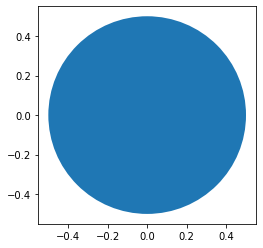

In [ ]:
import matplotlib.pyplot as plt


def create_circle():
    circle = plt.Circle((0, 0), radius=0.5)
    return circle


def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()


c = create_circle()
show_shape(c)


def を外して実験してみよう。

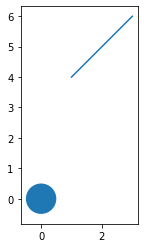

In [ ]:
import matplotlib.pyplot as plt

# ax = plt.gca()
fig = plt.figure()
ax = fig.add_subplot()

c = plt.Circle((0,0), radius=0.5)

ax.add_patch(c)
ax.plot([1,2,3],[4,5,6])
plt.axis('scaled')
plt.show()

基本的に普通の pyplot で Circle とかの命令で図を描いて、add_patch で 追加して、plt.show すればいいみたい。


縦横比がおかしかったら

ax.set_aspect('equal')

とする、とのこと。

縁の色 edge color と塗りつぶしの色 face color (fill color) は fc='g'、 ec='r' のように指定する。 円以外にも楕円 Ellipse、多角形 Polygon、四辺形 Rectangle、などの patch がある。





# アニメーション

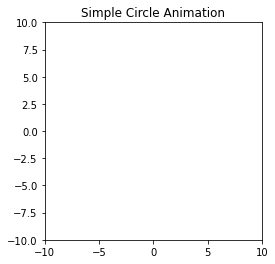

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation

def create_circle():
    circle = plt.Circle((0, 0), radius=0.5)
    return circle

def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_radius, fargs=(circle,), frames=30, interval=50)
    plt.title('Simple Circle Animation')
    plt.show()

create_animation()



上の例がとりあえず動かないというか表示されないので、ネットで成功したという例をコピペする。

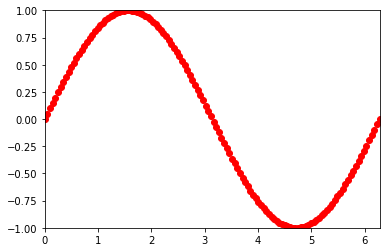

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2 * np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 128),
                    init_func=init, blit=True, interval=50)

# HTML(ani.to_jshtml())
HTML(ani.to_html5_video())  # またはこちら

## p. 154